# POL280 Bayesian Modelling Memo & Codes

(Contents are originally provided by Christopher Hare, annotated and revised by Gento Kato)

***THIS MEMO IS NOT COMPLETE***

## Topic 1: Introduction (04/13/2017) 

###  Monte Carlo Simulation

inside
   0    1 
2106 7894 

[1] 3.1392

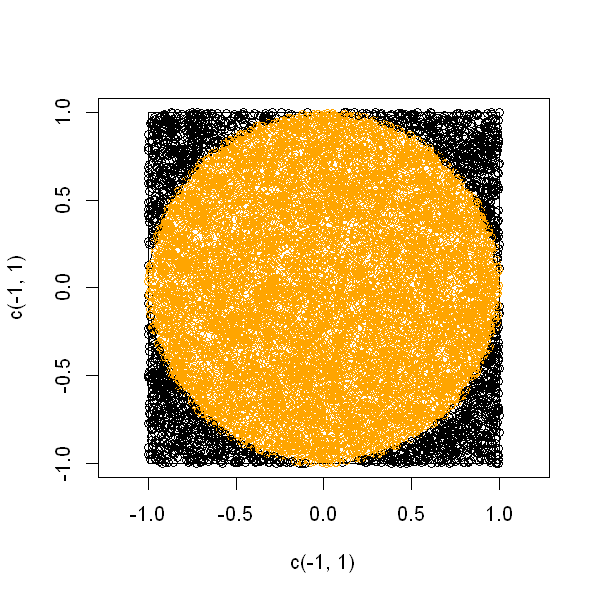

In [3]:
## Monte Carlo Simulation ##

#install.packages("plotrix")
library(plotrix)
library(grid)

options(repr.plot.width=5, repr.plot.height=5)
## Plot Rectangle and Circle
plot(c(-1, 1), c(-1, 1), type = "n", asp = 1)
rect(-1, -1, 1, 1)
draw.circle(0, 0, 1)

## Conduct Simulation 
nsamp <- 10000 # The size of sample
inside <- NA # Storage for those values inside the cirlce
for(i in 1:nsamp){
  x <- runif(2, -1, 1) ## Draw two values from uniform distribution (-1, 1)
  if (sqrt(x[1] * x[1] + x[2] * x[2]) < 1) {
    inside[i] <- 1; points(x[1], x[2], col = "orange")
  }
  if (sqrt(x[1] * x[1] + x[2] * x[2]) > 1) {
    inside[i] <- 0; points(x[1], x[2], col = "black")
  }
}

table(inside)
4 * (7848 / 10000)

## Topic 2: Simple Bayesian Models and Priors (04/20/2017)

### Intuition: The Monty Hall Problem

Suppose you're on a game show and you're given teh choice of three doors: Behind one door is a car; behind the otheres, goats. You pick a door, say No.1, and the host, who knows what's behind the doors, opens another door, say No.3, which has a goat. He then says to you "Do you wan to pick door No.2?" Is it to your advantage to switch your choice?

Let's pick door 1, and Monty then opens door 2 to show us a goat.

Let A represent the outcome that the car is behind door 1. Let B represent the event that we're shown a goat behind door 2:

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

Let's Simulate by R!

In [92]:
## Monty Hall Problem Simulation ##
doors <- c("1", "2", "3") # Three Doors 
sim_montyhall <- function(door){
car <- sample(doors, 1) # define the door with car
pick <- doors[door] # your pick of the door
open <- sample(doors[which(doors!=car & doors!=pick)], 1) # define the door opened
return(pick==car) # return if the car is behind your picked door.
}
sims <- replicate(10000, sim_montyhall(1) ) #repeat the process many times
mean(sims) # The probability

[1] 0.3259

### Bayesian Inference

#### Do Statistical Inference

In the statistical inference context, A is replaced with $\theta$ (unknown parameters), and B is replaced with $y$ (data). Therefore, the equation becomes:

\begin{align}
P(\theta|y) &= \frac{P(\theta) P(y|\theta)}{P(y)} \\
&\propto P(\theta) L(\theta|y)
\end{align}

Intuitively stated:

Posteriot Probability (of parameter level) $\propto$ Prior Probability $\times$ Likelihood Function

It's all about **distribution**!

#### Setting Prior

Given the function given above, **prior matters** the most when the **data is sparse** (small size?) Data dominates the prior when there is enough data.

The variance of prior matters. As the **variance of prior distribution increases**, the **impact of data on poterior distribution increases**.

### Bayesian Mechanics

#### Three Steps to Model Bayesan

1. Specify... <br>
1) the probability model of **how $y$ were generated** (likelihood function) <br>
2) **prior belief** of $\theta$ (probability distribution)

2. **Update $\theta$** by conditioning the probability model on the **data**.

3. Evaluate model fit and sensitivity.

#### First Step (1): Likelihood Function

**Sampling density** $p(y | \theta)$ is an assumption about the probability distribution that generated $y$. 

Defined as **PDF** (probability density functons) **if $y$ is continuous** random variables (e.g., normal distribution), <br> 
defined as **PMF** (probability mass functions) **if $y$ is discrete** random variables (e.g., binomial/poisson distribution).

If **$y$ is fixed** (i.e., observed data) and **$\theta$ is unknown** (e.g., coefficients from regression model), then $p(y | \theta)$ is also called **likelihood function**. It is Calculataed as:

\begin{equation}
L(\theta | y) = \prod_{i=1}^n p(y_i | \theta)
\end{equation}

<center>(Product of each $y_i$'s probability for given $\theta$)</center>
<!---
Often easier to deal with natural log of the likelihood:
$$\mathit{l}(\theta | y) = \mbox{log}L(\theta | y)$$ 
Because the original likelihood often become very small, so we want to deal with the manageable numbers by taking log of it.  
--->　
 * **Frequentist** use of likelihood function: find the value of $\theta$ that maximizes the likelihood of data $y$: $\mbox{MLE}\left(\hat{\theta}\right)$. However this conceptualization cannot answer important questions such as: $pr (\theta > 0)$; $pr(\theta \in (a, b))$ or relative likelihood of competing models. <br><br>
 
 * **Bayesian** use of likelihood function: use it to extract $P(\theta|y)$. This is more interesting.




#### First Step (2): Specifying Priors

**Conjugate priors** produce posterior densities of the same distributional family as the prior.

* **Beta (prior) - Binomial (likelihood) $\Rightarrow$  Beta posterior**
  
  * This distribution is useful when the outcome variable is distributed across 0-1 range. Beta distribution takes values from 0 to 1, and binomial likelihood deals with the likelihood of value being 1 than 0. The calculation can be made as follows: <br>
\begin{align}
\mbox{Beta Prior } p(\theta) &= \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \\
\mbox{Binomial Likelihood } &= 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y}  
\end{align}

   Then (can take the constant out): <br><br>
\begin{align}
\mbox{Posterior } &\propto \mbox{Prior} \times \mbox{Likelihood} \\
\pi(\theta | y) &\propto \left\{ \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right\} \times \left\{ 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} \right\} \\
&\propto \theta^{\alpha - 1 + y} + (1 - \theta)^{\beta - 1 + n - y}
\end{align}

   The Solution is: <br><br>
\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}( \alpha + y, \beta + n - y) \\
E(\theta | y) &\approx \frac{\alpha + y}{\alpha + \beta + n} 
\end{align}

* **Gamma (Prior) - Poisson (Likelihood) $\Rightarrow$ Gamma Posterior**

\begin{align}
\mbox{Gamma } &= \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \\
\mbox{Poisson PMF } &= p(y | \theta) = \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
\mbox{Poisson Likelihood } &= \mathit{L}(\theta | y) = \hat{\Pi}_{i=1}^n \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
&= \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
\pi(\theta | y) &\propto \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \times \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
&\propto \theta^{\alpha - 1 + \Sigma y} e^{- \theta (\beta + n)} \\
&\propto \mbox{Gamma }(\alpha + \Sigma y, \beta + n)
\end{align}

### Motivating Example: Expected Performance of Base Ball Players

Variable of Interest: Baseball players hitting probability (theoretically ranges from 0-1)<br>
   * Prior Distribution: career batting averages of ALL baseball players (except for those who have really short career).
   * Data: career batter box appearnce and career hits for EACH baseball player (binomial)
   * Posterior: Expected performance of the player in the next batter box <br><br>
   
Use **Beta-Binomial conjugate priors** to model this variable!

In [25]:
## Library dplyr package 
library(dplyr) 

## Import Baseball Players Data
load("../data/POL280/baseball.Rda") 

## Filter data as AB >=500 (Appeared in batter box 500 or more times)
career_filtered <- career %>% filter(AB >= 500) 

## See inside
head(career_filtered) 
## H = hits; AB = appearnce at batter box, average = career batting av.

name,H,AB,average
Hank Aaron,3771,12364,0.3049984
Tommie Aaron,216,944,0.2288136
Ed Abbaticchio,772,3044,0.2536137
Fred Abbott,107,513,0.2085770
Jeff Abbott,157,596,0.2634228
Kurt Abbott,523,2044,0.2558708


Now, we can fit the binomial distribution to the "average" data and make it a prior distribution.

Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"Warning message in densfun(x, parm[1], parm[2], ...):
"NaNs produced"

[1] "The fitted beta distribution is B (alpha =  78.81 ; beta =  225.59 )"

[1] "The fitted distribution has a mean of  0.259  and the variance of  0.001"

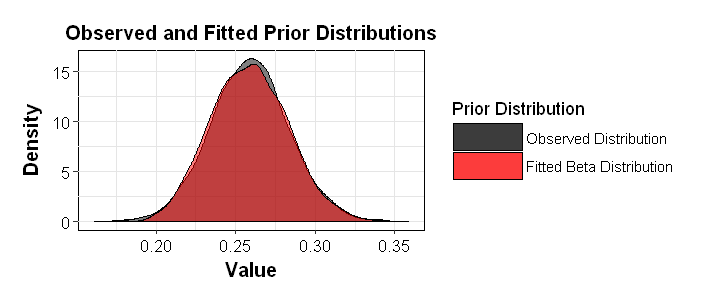

In [80]:
## Fitting beta distribution to the given batting average data
m <- MASS::fitdistr(career_filtered$average, dbeta,
                    ## starting value: alpha = 1, beta = 10                    
                    start = list(shape1 = 1, shape2 = 10))

## Store Parameters of fitted prior distribution (of expected batting average)
alpha0 <- m$estimate[1]; beta0 <- m$estimate[2]
paste("The fitted beta distribution is B (alpha = ", round(alpha0,2), "; beta = ", round(beta0,2), ")")

#Compare the observed distribution and fitted distribution. 
library(ggplot2); source("../sources/gktheme.R")
fittedprior <- rbeta(length(career_filtered$average),alpha0,beta0) 
 # generate fitted distributionn (same n as observed, for the comparison)
priordist <- data.frame(obs=career_filtered$average, fit=fittedprior) 
 # Store them into dataframe
bgraph <- ggplot(priordist) + gktheme +
    geom_density(aes(obs, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(fit, fill="2"), alpha = 0.5, size=0.5) +   
    scale_fill_manual(name="Prior Distribution",values=c(1,2), 
      labels = c("Observed Distribution","Fitted Beta Distribution"))+
    xlab("Value")+ ylab("Density")+
    ggtitle("Observed and Fitted Prior Distributions")+
    theme(legend.position = "right")

paste("The fitted distribution has a mean of ", round(mean(fittedprior),3), 
      " and the variance of ", round(var(fittedprior),3))
options(repr.plot.width=6, repr.plot.height=2.5)
bgraph

As shown above, we have almost perfect fit of beta distribution to the observed distribution. That's good.

Now, we can move on to estimate the posterior distribution of expected performance at the next batting opportunity.

In [28]:
## Store expected batting average from posterior distribution
career_eb <- career %>% mutate(eb_estimate = (H + alpha0) / (AB + alpha0 + beta0))

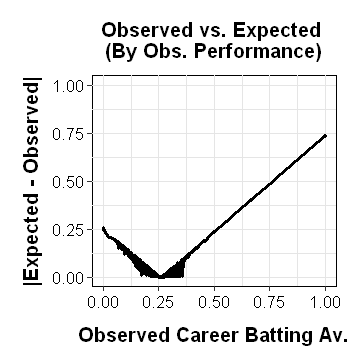

In [61]:
## Plot expected performance by observed career average
library(ggplot2); source("../sources/gktheme.R")
bgraph <- ggplot(career_eb) + gktheme +
    geom_line(aes(x = average, y = abs(average-eb_estimate)), size = 1) +   
    scale_y_continuous(limits=c(0,1))+ scale_x_continuous(limits=c(0,1))+
    xlab("Observed Career Batting Av.")+ 
    ylab("|Expected - Observed|")+
    ggtitle("Observed vs. Expected \n(By Obs. Performance)")
options(repr.plot.width=3, repr.plot.height=3)
bgraph

The above plot has a straight forward implication. The posterior expected performance gets further away from observed performance as the observed performance become more extreme relative to the mean of prior beleif distribution (= 0.258).

Let's look at the result from another perspective...

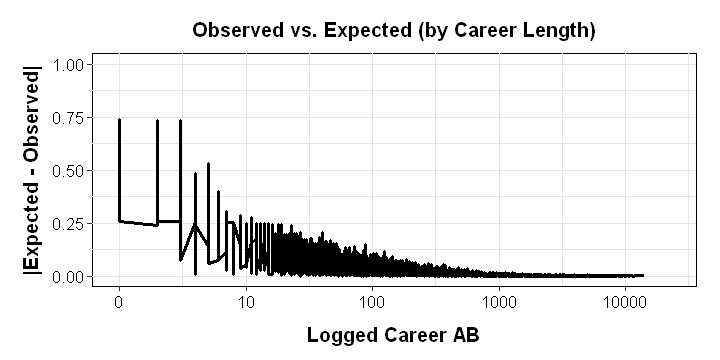

In [62]:
bgraph <- ggplot(career_eb) + gktheme +
    geom_line(aes(x = log(AB), y = abs(average-eb_estimate)), size = 1) +   
    scale_y_continuous(limits=c(0,1))+ 
    scale_x_continuous(limits=c(0,10),breaks=c(0,log(10),log(100),log(1000),log(10000)),
                       labels=c("0","10","100","1000","10000"))+
    xlab("Logged Career AB")+ ylab("|Expected - Observed|")+
    ggtitle("Observed vs. Expected (by Career Length)")
                       
options(repr.plot.width=6, repr.plot.height=3)
bgraph

The implication from the second plot is interesting. It indicates that, as the player has more data of its own, data is more likely to overwhelm prior beliefs.

Let's look at this in more precise way. Following three players have (approximately) same career batting average, but has different length in career (AB):

In [77]:
career[c(which(career_eb$name == "Pete Rose"),
         which(career_eb$name == "Eddie Brown"),
         which(career_eb$name == "Walt French")),][-2,]

name,H,AB,average
Pete Rose,4256,14053,0.3028535
Eddie Brown,878,2902,0.3025500
Walt French,297,981,0.3027523


We have the same prior distribution $\mbox{Beta}( \alpha \approx 78.81; \beta \approx 225.59)$, remember that the posterior distribution can be calculated as:

\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}( \alpha + y, \beta + n - y) 
\end{align}

Now, we can generate and plot the posterior distribution of the expected performance as follows:

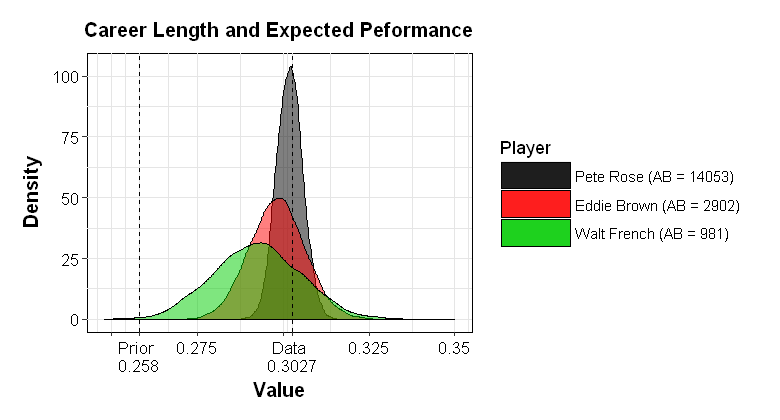

In [98]:
pete = rbeta(10000, alpha0 + 4256, beta0 + 14053 - 4256)
eddie = rbeta(10000, alpha0 + 878, beta0 + 2902 - 878)
walt = rbeta(10000, alpha0 + 297, beta0 + 981 - 297)

posteriordist <- data.frame(pete, eddie, walt)

bgraph <- ggplot(posteriordist) + gktheme +
    geom_density(aes(pete, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(eddie, fill="2"), alpha = 0.5, size=0.5) +   
    geom_density(aes(walt, fill="3"), alpha = 0.5, size=0.5) +   
    geom_vline(xintercept = 0.3027,linetype = 2) + 
    geom_vline(xintercept = 0.258,linetype = 2) + 
    scale_x_continuous(limits=c(0.248,0.35),breaks=c(0.25,0.258,0.275,0.3,0.3027,0.325,0.35),
                       labels=c("","Prior \n0.258",0.275,"","Data \n0.3027",0.325,0.35))+
    scale_fill_manual(name="Player",values=c(1,2,3), 
      labels = c("Pete Rose (AB = 14053)","Eddie Brown (AB = 2902)","Walt French (AB = 981)"))+
    xlab("Value")+
    ylab("Density")+
    ggtitle("Career Length and Expected Peformance")+
    theme(legend.position = "right")

options(repr.plot.width=6.5, repr.plot.height=3.5)
bgraph

The above illustration clearly indicates that expected performance of players with longer career is less dependent upon prior belief. Everyone knows that how Pete Rose is expected to perform next time according to his past, while prior belief takes much stronger role in predicting performance of Walt French. Also, note that uncertainty over the expectation is much larger (high variance) for player with shorter career (like Walt French) than for player with longer career (like Pete Rose).   

## Topic 3 Conjugate Priors Continue... (04/27/2017)

### Priors and Posteriors

 * **Conjugate priors** and **solicited priors**. Solicited priors are often more difficult to defend (convenient distribution to get better result...) <br><br>
 
 * If we want the prior to be **essentially flat**, it is popular to use uniform distibution (computationally challenging), or diffused normal (i.e., very high variance. Computationally little more easy).

### Use Conjugate Priors

#### Beta Distribution

\begin{align}
B(\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1}
\end{align}

This is a PDF on $[0, 1]$ interval, with expected value $\cfrac{\alpha}{\alpha + \beta}$ & variance $\cfrac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$ 

If $\alpha = \beta$, then the relevant statistics are reduced to expected value $\cfrac{1}{2}$ & variance $\cfrac{1}{4(2\beta + 1)}$.

Examples of the distribution.

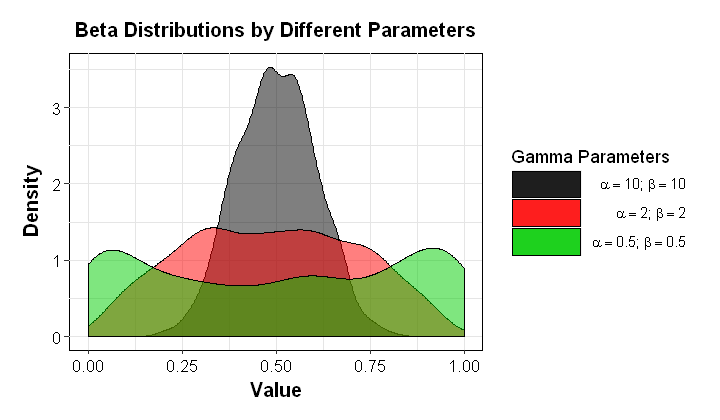

In [96]:
b1 <- rbeta(1000,10,10) # alpha = beta (small variance)
b2 <- rbeta(1000,2,2) # alpha = beta (medium variance)
b3 <- rbeta(1000,0.5,0.5) # alpha = beta (large variance)

library(ggplot2);
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/gktheme.R")

betadist <- data.frame(b1, b2, b3) 

## Plot Result ##
bgraph <- ggplot(betadist) + gktheme +
    geom_density(aes(b1, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(b2, fill="2"), alpha = 0.5, size=0.5) +   
    geom_density(aes(b3, fill="3"), alpha = 0.5, size=0.5) +   
    scale_fill_manual(name="Gamma Parameters",values=c(1,2,3), 
      labels = c(expression(paste(alpha == 10, "; " , beta == 10)),
                 expression(paste(alpha == 2, "; " , beta == 2)),
                 expression(paste(alpha == 0.5, "; " , beta == 0.5))))+
    xlab("Value")+
    ylab("Density")+
    ggtitle("Beta Distributions by Different Parameters")+
    theme(legend.position = "right")

options(repr.plot.width=6, repr.plot.height=3.5)
bgraph

$$\mbox{Binomial Likelihood } = 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} 
$$
 * The value of $\theta$ most likely to have produced the observed data is $\frac{y}{n}$

Then, from the last lecture, **posterior** is (can take the constant out for the minimization problem): 

\begin{align}
\mbox{Posterior } &\propto \mbox{Prior} \times \mbox{Likelihood} \\
\pi(\theta | y) &\propto \left\{ \frac{\Gamma(\alpha + \beta)}{\Gamma (\alpha) + \Gamma (\beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1} \right\} \times \left\{ 
\begin{pmatrix} 
n \\ y 
\end{pmatrix} 
\theta^y (1-\theta)^{n-y} \right\} \\
&\propto \theta^{\alpha - 1 + y} + (1 - \theta)^{\beta - 1 + n - y}
\end{align}

The Solution is:

\begin{align}
\mbox{Posterior } \pi (\theta | y) &\approx \mbox{Beta}\left( \alpha + y, \beta + n - y\right) \\
E(\theta | y) &\approx \frac{\alpha + y}{\alpha + \beta + n} 
\end{align}

#### Example: Undervoting (白票を投じる?)

 * Tomz and van Howelling (2003) finds that, using 1964-2004 ANES data, 10/1091 (0.91%) black respondents and 57/9770 (0.58%) of white respondents stated they undervoted. <br><br>
 
 * We know posterior distributions of undervoting: $\pi_{black}$, $\pi_{white}$ <br><br>
 
 * Set **prior** as $B(\alpha=1, \beta=100)$. Then we can extract the sample of posterior distribution as follows... <br>

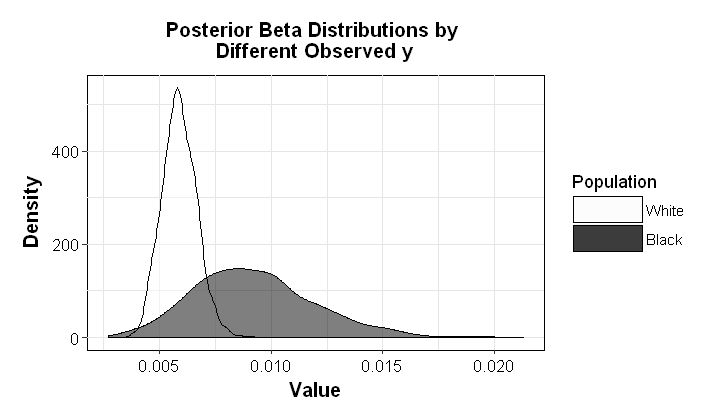

In [9]:
## Sample beta posterior distribution, given specified prior.
## Note that, in this specification, Beta( alpha + y, beta + n - y)
white <- rbeta(1000, (1 + 57), (100 + 9770 - 57)) ## Draw 1000
black <- rbeta(1000, (1 + 10), (100 + 1091 - 10)) ## Draw 1000

betadist <- data.frame(white,black) 

## Plot Result ##
bgraph <- ggplot(betadist) + gktheme +
    geom_density(aes(white, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(black, fill="2"), alpha = 0.5, size=0.5) +   
    scale_fill_manual(name="Population",
                      values=c("white","black"),labels = c("White","Black"))+
    xlab("Value") + ylab("Density")+
    ggtitle("Posterior Beta Distributions by \nDifferent Observed y")+
    theme(legend.position = "right")

options(repr.plot.width=6, repr.plot.height=3.5)
bgraph

We can calculate the "p-value" of Bayesian model as follows...

In [29]:
## Likelihood of black undervoting intention higher than white
table(black > white) 
## Calculate p-value of black undervotes more than whites
paste("Bayesian p-value is: ", table(black > white)[2] / 1000, 
      "(higher is better)")
## 95$ Credible Interval Can be Extracted Just as:
blackCI = quantile(black, probs=c(0.025, 0.095))
paste("Blac")
whiteCI = quantile(black, probs=c(0.025, 0.095))


FALSE  TRUE 
  114   886 

[1] "Bayesian p-value is:  0.886 (higher is better)"

* **Gamma (Prior) - Poisson (Likelihood) $\Rightarrow$ Gamma Posterior**

\begin{align}
\mbox{Prior Distribution} = \mbox{Gamma}(\alpha, \beta) &= \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \\
\mbox{Poisson PMF } &= p(y | \theta) = \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
\mbox{Poisson Likelihood } &= \mathit{L}(\theta | y) = \hat{\Pi}_{i=1}^n \frac{e^{-\theta} \theta^{y_i}}{y_i !} \\
&= \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
\mbox{Posterior Distribution } \pi(\theta | y) &\propto \frac{\beta^{\alpha}}{\Gamma (\alpha)} \theta^{\alpha-1} e^{- \beta \theta} \times \frac{e^{-\theta n} \theta^{\sum_{i=1}^{n} y_i} }{y_1 ! y_2 ! \dots y_n !} \\
&\propto \theta^{\alpha - 1 + \Sigma y} e^{- \theta (\beta + n)} \\
&\propto \mbox{Gamma }(\alpha + \Sigma y, \beta + n)
\end{align}

**Example: Appointments** $\Rightarrow$ Number of presidential appointments of some positions each year 

In [1]:
library(foreign)
appdta <- read.dta("../data/POL280/appointments.dta") ## Open Data
y <- appdta$appoints ; y ## Store observed y

[1] 2 3 3 2 0 1 2 1 2 1

Then, using R function rgamma(alpha, beta), we can create function to produce posterior distribution:

(Note on Gamma Distribution: Shape = alpha; scale = beta)

In [2]:
posterior <- function(sample, y, alpha, beta){
    n = length(y); sigmay = sum(y) 
    # n is y's sample size, sigmay is the sum of all y values
    return(rgamma(sample, alpha+sigmay, beta+n)) 
    # generate posterior distribution from prior's parameters
}

Before turning to the analysis, for the gamma distribution specification, the mean and variance of the distribution are defined as follows:

\begin{align}
Mean\left[gamma(\alpha, \beta)\right] &= \frac{\alpha}{\beta}\\
Var\left[gamma(\alpha, \beta)\right] &= \frac{\alpha}{\beta^2}\\
\end{align}

Now, suppose that there are two prior belief gamma distribution with the same mean (let's say 5), but different variance (certainty), as follows:

\begin{align}
\mbox{Prior 1 (ignorant): Mean } &= \frac{\alpha}{\beta} = \frac{5}{1} = 5 \\
\mbox{Variance } &= \frac{\alpha}{\beta^2} = \frac{5}{1} = 5\\
\mbox{Prior 2 (certain): Mean } &= \frac{\alpha}{\beta} = \frac{50}{10} = 5 \\
\mbox{Variance } &= \frac{\alpha}{\beta^2} = \frac{50}{100} = \frac{1}{2}
\end{align}

We can generate those two prior distributions in R as follows

In [3]:
## Set Alpha and Betas
a1 = 5; b1 = 1 ## Ignorant
a2 = 50; b2 = 10 ## Certain

## Generate Prior distribution
set.seed(27674) # Make this replicable
prior1 <- rgamma(10000, a1, b1) # Ignorant
prior2 <- rgamma(10000, a2, b2) # Certain

## Check Result
paste("For prior 1, mean is ", round(mean(prior1),2), 
      ", variance is ", round(var(prior1),2))
paste("For prior 2, mean is ", round(mean(prior2),2), 
      ", variance is ", round(var(prior2),2))

[1] "For prior 1, mean is  5.01 , variance is  4.94"

[1] "For prior 2, mean is  4.99 , variance is  0.51"

Now, the above two distributions can be plotted as follows:

In [4]:
library(ggplot2);
source("https://raw.githubusercontent.com/gentok/Method_Notes/master/sources/gktheme.R")

bayesdata <- data.frame(prior1 = prior1, prior2 = prior2) 

## Plot Result ##
bgraph <- ggplot(bayesdata) + gktheme +
    geom_density(aes(prior1, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(prior2, fill="2"), alpha = 0.5, size=0.5) +   
    scale_y_continuous(limits=c(0,0.6),breaks=c(0,0.2,0.4,0.6))+
    scale_x_continuous(limits=c(0,16.03),breaks=c(0,2.5,5,7.5,10,12.5,15))+
    scale_linetype_manual(name="Gamma Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    scale_fill_manual(name="Gamma Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    xlab("Prior Belief")+
    ylab("Density")+
    ggtitle("Prior Distributions by Different Parameters")+
    theme(legend.position = "right")

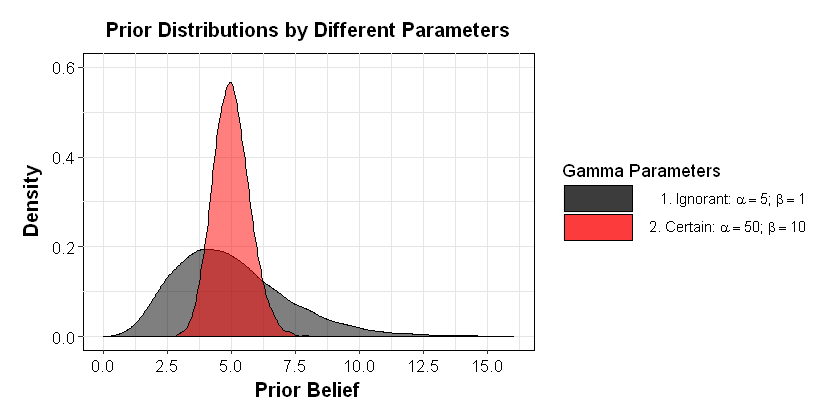

In [5]:
options(repr.plot.width=7, repr.plot.height=3.5)
bgraph

Note that at the start of example, I created following objects:

 * <code>y</code> variable, which is number of appointments by each president.
 * <code>posterior</code> function, to generate posterior distribution from gamma prior parameters and poisson likelihood
 
I use <code>posterior</code> function to generate posterior distribution, as follows:

In [6]:
set.seed(8900786) # Make this replicable
#posterior(y, alpha, beta) ## Alpha and Beta from prior distribution
posterior1 <- posterior(10000, y, a1, b1)
posterior2 <- posterior(10000, y, a2, b2)

Note that mean, median and variance of observed y is shown as follows:

In [7]:
paste("For observed y, mean is ", round(mean(y),2), 
      ", median is ", round(median(y),2), 
      ", variance is ", round(var(y),2))

[1] "For observed y, mean is  1.7 , median is  2 , variance is  0.9"

Now the characteristics of posterior distribution can be extracted as follows:

In [8]:
paste("For posterior 1, mean is ", round(mean(posterior1),2), 
      ", median is ", round(median(posterior1),2), 
      ", variance is ", round(var(posterior1),2))
paste("For posterior 2, mean is ", round(mean(posterior2),2), 
      ", median is ", round(median(posterior2),2), 
      ", variance is ", round(var(posterior2),2))

[1] "For posterior 1, mean is  2 , median is  1.96 , variance is  0.18"

[1] "For posterior 2, mean is  3.35 , median is  3.33 , variance is  0.17"

From the above result, the mean of posterior distrbution from more ignorant prior distribution (i.e., prior 1) is more strongly pulled by the observed y values than the mean of posterior distibution from certain prior distributon (i.e., prior 2). In other words, posterior distribution 1 has closer mean (i.e., mean is 2) to observed y (i.e., mean is 1.7) than posterior distribution 2 (i.e, mean is 3.35). The observed y has stronger influence on ignorant (high variance) prior belief than on certain (low variance) prior belief. Note that the variance for two posterior distributions are identical.

Now the Result can be plotted as follows:

In [9]:
bayesdata$posterior1 <- posterior1 
bayesdata$posterior2 <- posterior2

## Plot Result ##
bgraph2 <- ggplot(bayesdata) + gktheme +
    geom_density(aes(posterior1, fill="1"), alpha = 0.5, size=0.5) +   
    geom_density(aes(posterior2, fill="2"), alpha = 0.5, size=0.5) +   
    scale_y_continuous(limits=c(0,1),breaks=c(0,0.25,0.5,0.75,1))+
    scale_x_continuous(limits=c(0,6),breaks=c(0,1,2,3,4,5,6))+
    scale_linetype_manual(name="Gamma Prior Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    scale_fill_manual(name="Gamma Prior Parameters",values=c(1,2), 
      labels = c(expression(paste("1. Ignorant: ", alpha == 5, "; " , beta == 1)),
                 expression(paste("2. Certain: ", alpha == 50, "; " , beta == 10))))+
    xlab("Posterior Belief")+
    ylab("Density")+
    ggtitle("Posterior Distributions by Prior Parameters")+
    theme(legend.position = "right")

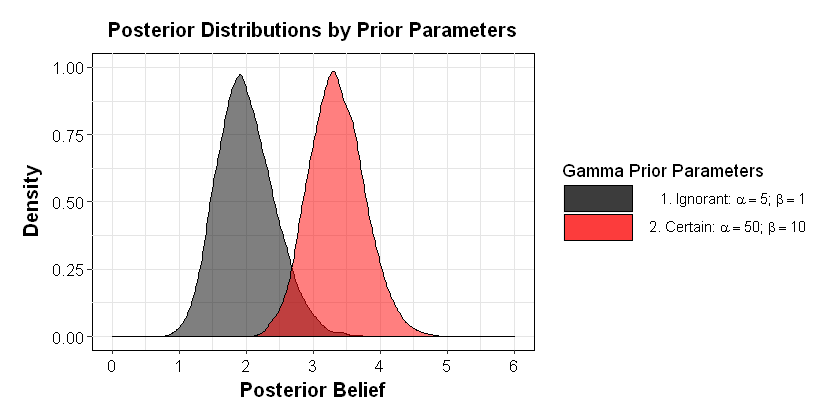

In [10]:
options(repr.plot.width=7, repr.plot.height=3.5)
bgraph2

The above plot further confirmes the implication. While the shape of two posterior distributions are almost identical, the posterior distribution for ignorant prior is placed left of the posterior distribution for certain prior. Given that both prior distribution had the same mean of 5, ignorant prior holders are more strongly pulled by the observation of y (mean of 2) than certain prior holders. 

## Topic 4 MCMC Sampling (04/27, 05/04/2017)

### Monte-Carlo Simulation (First MC)

 * **Problem**:  How do you solve multidimensional integral equations needed to model behavior of complex systems with many random quantities? The complex density that has no simple function to describe them. <br><br>
 
 * **Solution**: We can learn learn by sampling many times from $f(\theta)$, the density of $\theta$. We assume that, as $n \rightarrow \infty$, $\hat{\theta} \rightarrow \theta$ (We borrow frequentist assumption).  

#### Rejection Sampling: 

* Sample a value z from a distribution $g(x)$ that's easy to sample from and for which all values of $k \times g(x)$ are greater than our distribution of interest $f(x)$ at all points.

* We’re going to call f(x) our **target** distribution and g(x) our
**enveloping** distribution.

* Compute the ratio: $$ R = \cfrac{f(z)}{k \times g(z)}$$

* Sample $u \approx Unif(0, 1)$. If $R > u$, accept $z$ as a draw from $f(x)$. Otherwise, reject. Repeat process a bunch of times.

In [2]:
## Some Complicated Function of z (Target)

## Rejection Sampling Function 

target <- function(z){return((1/40)*(2*z+3))} # Some unknown comlicated function
enveloping <- .2 ## Enveloping Distribution (uniform)
k <- 2 ## Linear multiplyer of enveloping distribution 
# a <- 0 ## Lower Boundary in the simulation 
# b <- 5 ## Higher Boundary in the simulation
#ndraws <- 100000 ## Number of simulation 

rjsample <- function(target, enveloping, k, a = 0, b = 5, ndraws = 100000){
    proposed <- accept <- rep(NA,ndraws) ## Prepare Storage
    for (i in 1:ndraws){
        proposed[i] <- z <- runif(1, a, b)
        R <- target(z) / (k * enveloping) ## Calculate R
        if(R > runif(1, 0, 1)){accept[i] <- z} ## Accept if R > u
    }
    return(list(proposed,accept))
}

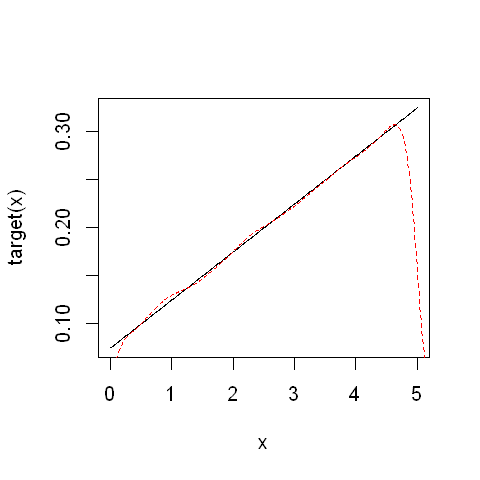

In [5]:
rjres <- rjsample(target, enveloping, k)
proposed <- rjres[[1]]
accept <- rjres[[2]]

options(repr.plot.width=4, repr.plot.height=4)
x <- seq(0,5,0.01)
plot(x, target(x), type="l")
lines(density(accept, na.rm=TRUE), lty=2, col="red")
#
#length(proposed[accept < 1 & !is.na(accept)])
#length(proposed[proposed < 1])
#
#length(proposed[accept > 4 & !is.na(accept)])
#length(proposed[proposed > 4])

### Markov-Chains (Second MC)

* A **Markovian process** describes a probabilistic sequence in which the state of an object *depends on all previous states*, but only through its *immediate predecessor*. (chain is "memoryless," but nonetheless dependent.)

* **Markov chains** refer to Markovian processes occuring in **discrete** time and/or discrete state spaces ($\Theta$).

* **Transition matrix** defines how the chain wonders about $\Theta$ ($\Theta$ is going to include all possible values of our parameter $\theta$). It defines the probability of "jumps" by the chain to a new (discrete) regison of $\Theta$, conditional on its current position. Rows will sum to 1. 

Transition Matrix: 

In [16]:
P <- matrix(c(0.7,0.2,0.1,0.3,0.3,0.4,0.6,0.2,0.2),
nrow=3, byrow=TRUE)
print(P) ## Transition Matrix

     [,1] [,2] [,3]
[1,]  0.7  0.2  0.1
[2,]  0.3  0.3  0.4
[3,]  0.6  0.2  0.2


Simple Function of Markov Chain Generation: 

In [28]:
# S: vector of starting value (discrerte) 
# P: transition matrix
# nsteps = number of steps of simulation

mchain <- function(S, P, nsteps){
    resS <- matrix(NA, nrow=nsteps, ncol=length(S)) ## Result Matrix
    resS[1,] <- S # Initial Value
    for (i in 1:(nsteps-1)){ 
        resS[i+1,] <- resS[i,] %*% P ## update S by transition matrix
    }
    return(resS) #return result matrix
}

## Example:
S <- c(1,0,0)
resS <- mchain(S, P, 10)
print(resS)

           [,1]      [,2]      [,3]
 [1,] 1.0000000 0.0000000 0.0000000
 [2,] 0.7000000 0.2000000 0.1000000
 [3,] 0.6100000 0.2200000 0.1700000
 [4,] 0.5950000 0.2220000 0.1830000
 [5,] 0.5929000 0.2222000 0.1849000
 [6,] 0.5926300 0.2222200 0.1851500
 [7,] 0.5925970 0.2222220 0.1851810
 [8,] 0.5925931 0.2222222 0.1851847
 [9,] 0.5925926 0.2222222 0.1851851
[10,] 0.5925926 0.2222222 0.1851852


### Monte Carlo + Markov Chain (MCMC)

* **Monte Carlo** principle: can learn anything about $\theta$ by sampling from its density $p(\theta)$.<br><br>

* **Markov chains**: Dependent samples will form a Markov chain, which has nice properties (ergodic). (If a chain is recurrent (visits every subspace inﬁnitely in the limit) and aperiodic (doesn’t repeat), it is ergodic. Ergodicity means that the chain (even though it has serial dependence) will visit a given region in proportion to its density, and that in the limit the values converge on the true value of $\theta$.)



#### Metropolis Hastings Algorithm

In [7]:
# n: Number of Simulation
# eps: boundary of distribution
metrop1 <- function(n=1000,eps=0.5){
    vec <- rep(NA, n) ## Create Value Vector
    vec[1] <- x <- 0 ## Set Starting Value (Can be any. Arts Involved) 
    accept <- rep(0, n) ## Create Acceptance Vector (Default = 0)
    for (i in 2:n) { 
        set.seed(372 + i) # For replication
        epsilon <- runif(1, -eps, eps) # draw random jump
        candidate <- x + epsilon # add random value to current value
        aprob <- dnorm(candidate) / dnorm(x) # ratio
        u <- runif(1) # draw unif(0,1)
        if (u < aprob) { ## Accepting...
            accept[i] <- 1
            x <- candidate ## alternate x with candidate
            }
            vec[i] <- x
        }
        return(list(vec,accept))
}

# Execute
samples <- metrop1(1000, 1)
table(samples[[2]])[2]/length(samples[[2]]) ## Acceptance rate 

1 
0.82

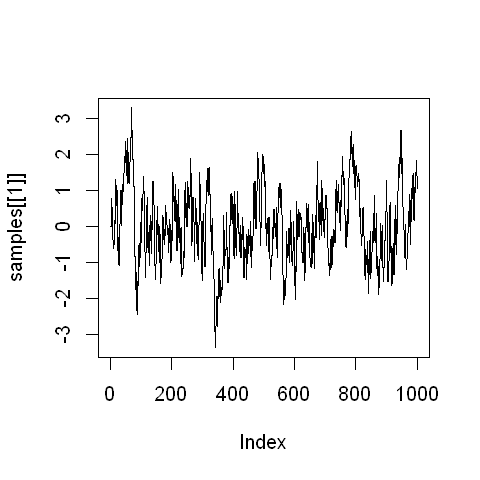

In [8]:
options(repr.plot.width=4, repr.plot.height=4)
plot(samples[[1]], type="l") ## Plot the process

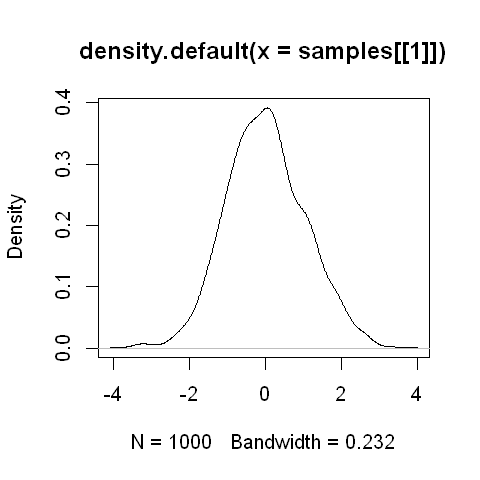

In [9]:
options(repr.plot.width=4, repr.plot.height=4)
plot(density(samples[[1]]), type="l") ## Plot the density

#### Gibbs Sampling

* MH can be inefficient when $\theta$ is highly dimentional/
* Motivation: Joint PDFs are just a series of univariate conditional densities.
* Intuition: Paritition $\theta$ into a $q$-length parameter vector $(\theta_1,...,\theta_q)$. Sample from $\theta_1$ while holding all other θ values constant. Do the same for all elements of $\theta_{1:q}$. Repeat.

In [2]:
# n: Number of simulation
# rho: parameter to control skew (higher value more skewed)
# xstart, ystart: starting values

# Two dimentional Gibbs Sampling
gibbs <- function (n, rho, xstart=0, ystart=0){
    out <- matrix(ncol = 2, nrow = n)
    out[1, ] <- c(xstart, ystart)
    x <- xstart # assign x starting values
    y <- ystart # assign y starting values
    for (i in 2:n) {
        set.seed(34768 + i) # make it replicable
        x <- rnorm(1, rho * y, sqrt(1 - rho^2)) # Draw from normal distribution
        y <- rnorm(1, rho * x, sqrt(1 - rho^2)) # Same
        out[i, ] <- c(x, y)
    }
    out
}

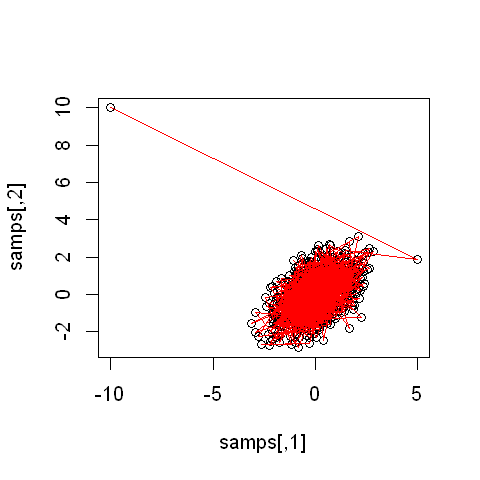

In [3]:
samps <- gibbs(1000, 0.5, -10, 10)
#
options(repr.plot.width=4, repr.plot.height=4)
plot(samps)
lines(samps, col="red")

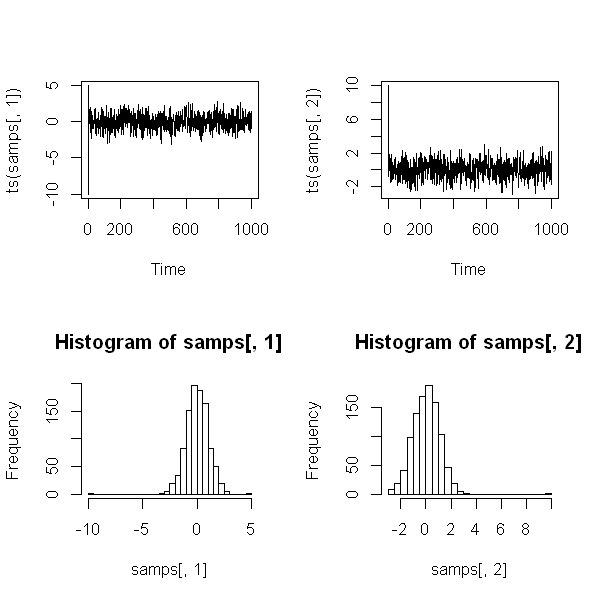

In [5]:
par(mfrow=c(2,2))
plot(ts(samps[,1]))
plot(ts(samps[,2]))
hist(samps[,1],40)
hist(samps[,2],40)
options(repr.plot.width=6, repr.plot.height=56)

## Topic 5: The Bayesian Linear Model (05/11/2017)

In [15]:
#install.packages("rjags", repos = "http://cran.cnr.berkeley.edu/", lib = "C:/ProgramData/Anaconda2/R/library")
library(rjags)
#install.packages("mcmcplots", repos = "http://cran.cnr.berkeley.edu/", lib = "C:/ProgramData/Anaconda2/R/library")
library(mcmcplots)

### JAGS code for normally distributed data

In [16]:
normalJAGS <-  
"model{
for (i in 1:N){
y[i] ~ dnorm(mu, tau)
mu ~ dnorm(0, 1)
tau ~ dgamma(.1, .1)
}
}"

### JAGS code for linear model

**First Model**

In [17]:
linearJAGS1 <- 
"model{
for (i in 1:N){
y[i] ~ dnorm(mu[i], tau)
mu[i] <- alpha + beta1*x1[i] + beta2*x2[i]
}
tau ~ dgamma(.1, .1)
}"

**Second Model:** Add prior for coefficients

In [18]:
linearJAGS2 <- 
"model{
for (i in 1:N){
y[i] ~ dnorm(mu[i], tau)
mu[i] <- alpha + beta1*x1[i] + beta2*x2[i]
}
alpha ~ dnorm(0, 1)
beta1 ~ dnorm(0, 1)
beta2 ~ dnorm(0, 1)
tau ~ dgamma(.1, .1)
}"

**Third Model:** Make priors to be really not informative.

In [19]:
linearJAGS3 <- 
"model{
for (i in 1:N){
y[i] ~ dnorm(mu[i], tau)
mu[i] <- alpha + beta1*x1[i] + beta2*x2[i]
}
alpha ~ dnorm(0, .001)
beta1 ~ dnorm(0, .001)
beta2 ~ dnorm(0, .001)
tau ~ dgamma(.1, .1)
}"

### Example: Angell Dataset

The <code>Angell</code> data frame has 43 rows and 4 columns. The observations are 43 U. S. cities around 1950.

This data frame contains the following columns:
 * **moral**: Moral Integration: Composite of crime rate and welfare expenditures.
 * **hetero**: Ethnic Heterogenity: From percentages of nonwhite and foreign-born white residents.
 * **mobility**: Geographic Mobility: From percentages of residents moving into and out of the city.
 * **region**: A factor with levels:  E Northeast; MW Midwest; S Southeast; W West.

In [25]:
## Load Data
library(car); data(Angell); df <- Angell 

## OLS Prediction of Frequentist Model
ols <- lm(moral ~ hetero + mobility, data=df)
summary(ols) ## Predicting Morality by Heterogeneity and Mobility


Call:
lm(formula = moral ~ hetero + mobility, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.071 -1.194 -0.206  1.738  4.195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.94076    1.19265  16.720  < 2e-16 ***
hetero      -0.10856    0.01699  -6.389 1.34e-07 ***
mobility    -0.19331    0.03543  -5.456 2.74e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.243 on 40 degrees of freedom
Multiple R-squared:  0.6244,	Adjusted R-squared:  0.6056 
F-statistic: 33.25 on 2 and 40 DF,  p-value: 3.126e-09


**JAGS code for Linear Regression**

VERY uninformative prior for coefficients

In [26]:
angell.model <- "model{
for(i in 1:N){
moral[i] ~ dnorm(mu[i], tau)
mu[i] <- alpha + beta1 * hetero[i] + beta2 * mobility[i]
}
alpha ~ dunif(-1000, 1000)
beta1 ~ dunif(-1000, 1000)
beta2 ~ dunif(-1000, 1000)
tau ~ dgamma(.1, .1)
}"
## VERY uninformative priors of parameters.

**Prepare data for JAGS**

In [27]:
## Prepare Data
moral <- df$moral ## DV
hetero <- df$hetero ## IV 1
mobility <- df$mobility ## IV 2
N <- length(moral) ## The sample size of data 

#Set of Parameters
angell.params <- c("alpha", "beta1", "beta2")

angell.inits <- function(){
list("alpha" = rnorm(1,20,1), "beta1" = rnorm(1), "beta2" = rnorm(1))
}

In [28]:
angell.fit <- jags.model(textConnection(angell.model),
data = list(moral=moral, hetero=hetero, mobility=mobility, N=N),
inits = angell.inits, n.chains = 2, n.adapt = 10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 43
   Unobserved stochastic nodes: 4
   Total graph size: 271

Initializing model



In [29]:
samples <- coda.samples(angell.fit, angell.params, n.iter=5000, thin=5)
# thin: Just extracting every 5th observation in each iteration

In [30]:
head(samples)

[[1]]
Markov Chain Monte Carlo (MCMC) output:
Start = 10005 
End = 10035 
Thinning interval = 5 
        alpha       beta1      beta2
[1,] 19.14355 -0.08718706 -0.2022865
[2,] 17.84664 -0.06046653 -0.1985427
[3,] 18.87225 -0.06926965 -0.2054157
[4,] 18.19695 -0.07127511 -0.1797579
[5,] 17.02662 -0.08652951 -0.1247342
[6,] 17.15449 -0.06240277 -0.1535588
[7,] 18.72666 -0.08242346 -0.1600116

[[2]]
Markov Chain Monte Carlo (MCMC) output:
Start = 10005 
End = 10035 
Thinning interval = 5 
        alpha      beta1      beta2
[1,] 19.79673 -0.1080247 -0.1996266
[2,] 20.29092 -0.1214276 -0.1727345
[3,] 19.17477 -0.1240667 -0.1449713
[4,] 18.73359 -0.1161929 -0.1476974
[5,] 18.93016 -0.1265761 -0.1482353
[6,] 18.32811 -0.1282926 -0.1278959
[7,] 18.92632 -0.1111359 -0.1507272

attr(,"class")
[1] "mcmc.list"

Rows represent extracted samples, columns represent parameters

In [31]:
## Put results into the data frame
all <- do.call(rbind, samples)
summary(samples)


Iterations = 10005:15000
Thinning interval = 5 
Number of chains = 2 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
alpha 19.9484 1.26444 0.0282737      0.0742109
beta1 -0.1086 0.01774 0.0003966      0.0005919
beta2 -0.1933 0.03756 0.0008398      0.0021540

2. Quantiles for each variable:

         2.5%     25%     50%      75%    97.5%
alpha 17.4440 19.1078 19.9542 20.78329 22.47033
beta1 -0.1441 -0.1208 -0.1086 -0.09614 -0.07361
beta2 -0.2679 -0.2191 -0.1937 -0.16758 -0.11922


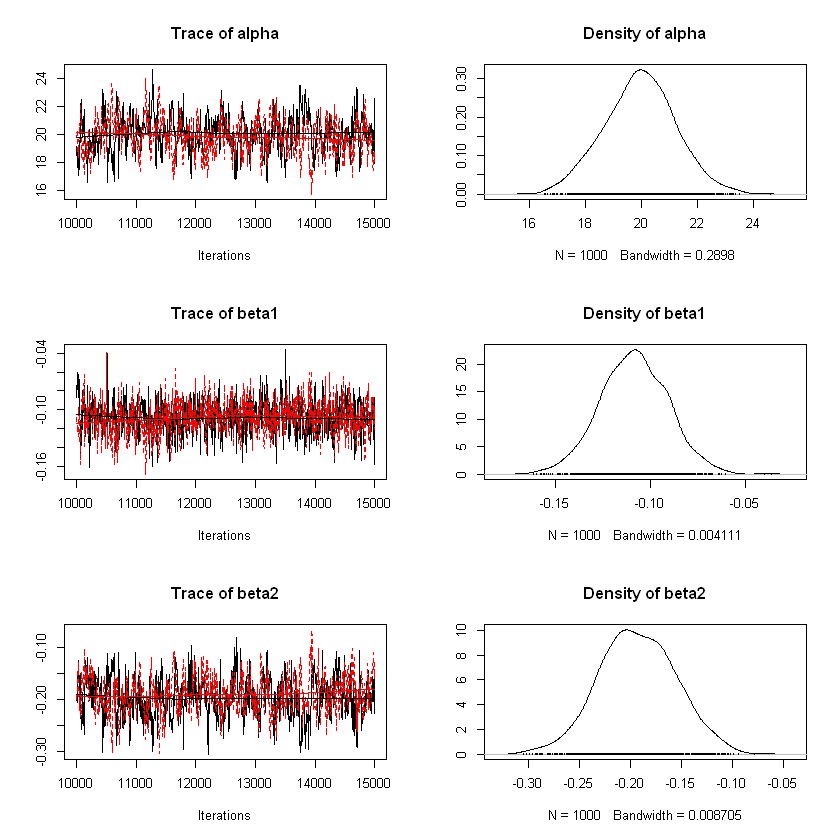

In [41]:
options(repr.plot.width=7, repr.plot.height=7)
plot(samples) 

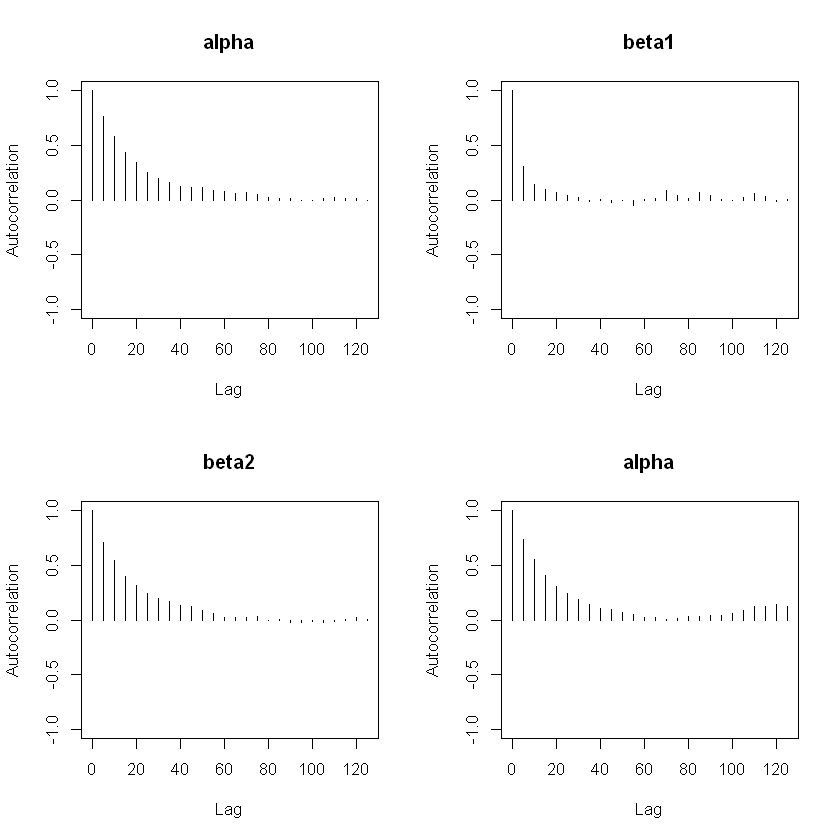

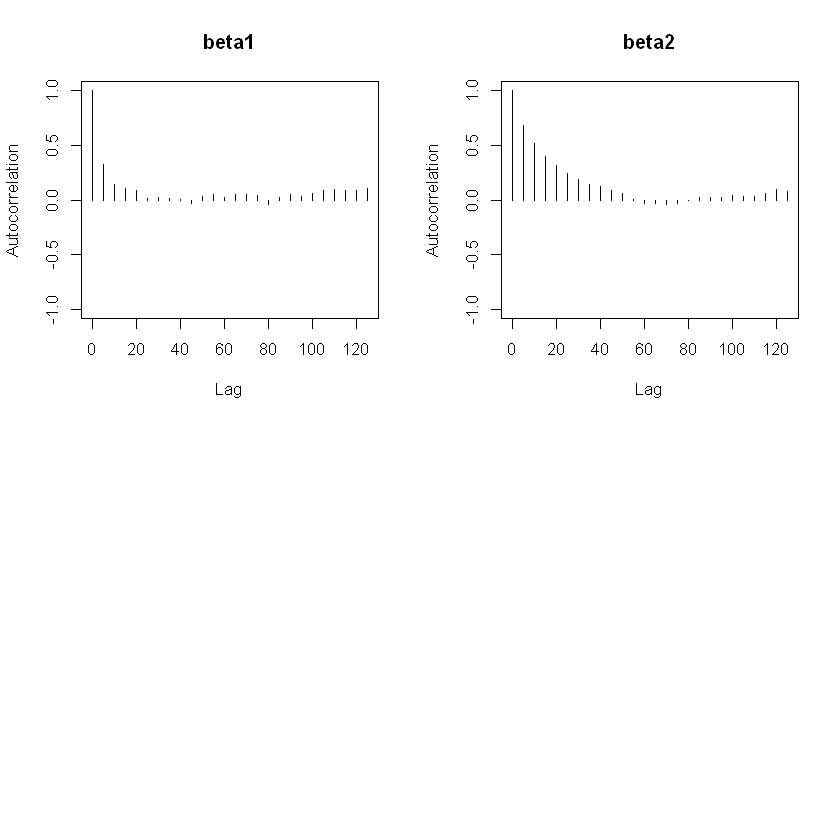

In [46]:
options(repr.plot.width=7, repr.plot.height=7)
autocorr.plot(samples)

In [47]:
angell.factor <- 
"model{
for(i in 1:N){
indicator1[i] ~ dnorm(mu1[i], tau1)
mu1[i] <- beta1 * factor[i]
indicator2[i] ~ dnorm(mu2[i], tau2)
mu2[i] <- beta2 * factor[i]
indicator3[i] ~ dnorm(mu3[i], tau3)
mu3[i] <- beta3 * factor[i]
}
beta1 ~ dnorm(0, 0.01)
beta2 ~ dnorm(0, 0.01)
beta3 ~ dnorm(0, 0.01)
tau1 ~ dgamma(.1, .1)
tau2 ~ dgamma(.1, .1)
tau3 ~ dgamma(.1, .1)
for (i in 1:N){democracy[i] ~ dnorm(0,1)}
}"

**Geweke Diagnostics**

In [48]:
geweke.diag(samples)

[[1]]

Fraction in 1st window = 0.1
Fraction in 2nd window = 0.5 

  alpha   beta1   beta2 
-0.6343  1.2615  0.4939 


[[2]]

Fraction in 1st window = 0.1
Fraction in 2nd window = 0.5 

  alpha   beta1   beta2 
-0.2469 -0.6176  0.6024 



We want it to be Less than 1.96 (Since these are t-statistics)

**Gelman-Rubin:** ANOVA test for equality of variances
between two or more parallel chains.

We want ratio = shrinkage factor of about 1 (less than 1.2) 

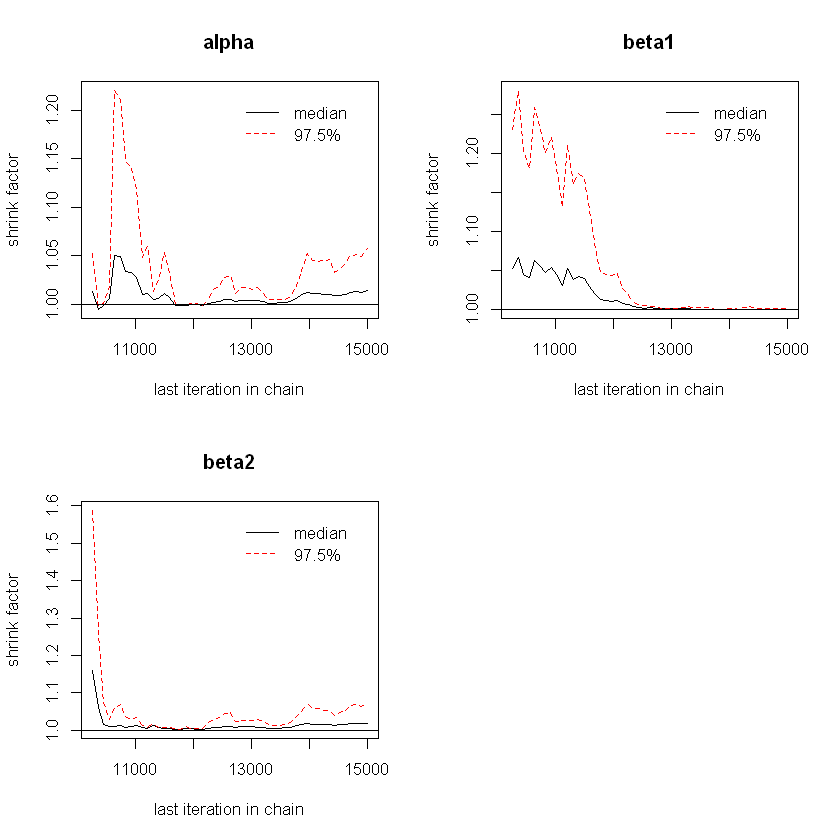

In [49]:
gelman.plot(samples)

In [50]:
mcmcplot(samples)

## Topic 6: Bayesian Generalized Linear Models (05/18/17)

### Binary Outcomes

**Probit Model**

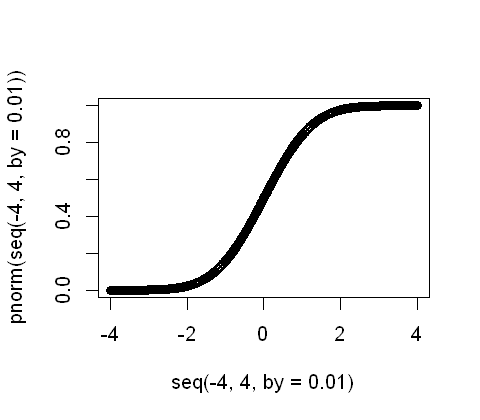

In [24]:
options(repr.plot.width=4, repr.plot.height=3.5)
plot(seq(-4,4,by=0.01), pnorm(seq(-4,4,by=0.01)))

### JAGS code for probit

**Model 1**

In [ ]:
probit1 <- 
"model{
for (i in 1:N){
ystar[i] ~ dnorm(mu[i], 1)
# y=1 if ystar <= 0
fail[i] ~ dinterval(ystar[i], 0)
# mean of ystar
mu[i] <- alpha + beta1*temp[i]
# latent residual
eps[i] <- ystar[i] - mu[i]
}
alpha ~ dnorm(0, 0.01)
beta1 ~ dnorm(0, 0.01)
}"

**Model 2 (better code)**

In [ ]:
probit2 <- 
"model {
for (i in 1:N) {
fail[i] ~ dbern(pi[i])
probit(pi[i]) <-alpha + beta1*temp[i]
}
alpha ~ dnorm(0, 0.01)
beta1 ~ dnorm(0, 0.01)
}"

### Example: Admission Dataset

Admissions to the graduate programs (0 = rejected, 1 = accepted) 

In [59]:
library(rjags)
library(car)
library(lattice)
library(mcmcplots)
#install.packages("ggmcmc", repos = "http://cran.cnr.berkeley.edu/", lib = "C:/ProgramData/Anaconda2/R/library")
library(ggmcmc)

Import Data

In [62]:
df <- read.csv("http://stats.idre.ucla.edu/stat/data/binary.csv")
#
xtabs(~admit + rank, data = df)
#
#df$fail <- as.numeric(df$damage > 0)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

Run the Frequentist Model

In [63]:
probit <- glm(admit ~ gre + gpa + rank, data=df, family=binomial(link="probit"))
summary(probit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = binomial(link = "probit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5626  -0.8920  -0.6403   1.1631   2.2097  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.0915037  0.6718360  -3.113  0.00185 ** 
gre          0.0013982  0.0006487   2.156  0.03112 *  
gpa          0.4643598  0.1950263   2.381  0.01727 *  
rank        -0.3317117  0.0745524  -4.449 8.61e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 459.48  on 396  degrees of freedom
AIC: 467.48

Number of Fisher Scoring iterations: 4


Prepare the bayesian model in JAGS, with uninformative priors

In [69]:
probit.model <- "model{
	for (i in 1:N) {
	admit[i] ~ dbern(pi[i])
	probit(pi[i]) <-alpha + beta1*gre[i] + beta2*gpa[i] + beta3*rank[i]
	}
	alpha ~ dnorm(0, 0.01)
	beta1 ~ dnorm(0, 0.01)
	beta2 ~ dnorm(0, 0.01)
	beta3 ~ dnorm(0, 0.01)
}"

Transform Data format 

In [70]:
jagsdat <- as.list(df) ## list by variables (columns) 
jagsdat$N <- nrow(df) ## Number of rows in the dataset

Set staring parameters: Here, we set starting values of coefficients as the random variable of normal distribution with mean 1, variance 1. (Recommended to start from the parameters close to zero)

In [71]:
model.params <- c("alpha", "beta1", "beta2", "beta3", "pi")
#
model.inits <- function(){
list("alpha" = rnorm(1), "beta1" = rnorm(1), "beta2" = rnorm(1), "beta3" = rnorm(1))
}

Fit JAGS probit model: (Run for 10000 times)

In [72]:
admissions.fit <- jags.model(textConnection(probit.model),
	data = jagsdat,
	inits = model.inits, n.chains = 2, n.adapt = 10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 400
   Unobserved stochastic nodes: 4
   Total graph size: 2557

Initializing model



Trace the process using sampling code:

coda.sample : A trace monitor for all requested nodes, updates the model, and coerces the output to a single mcmc.list object: <br>
<code>coda.samples(model, variable.names, n.iter, thin = 1, na.rm=TRUE, ...)</code>

In [73]:
samples <- coda.samples(admissions.fit, model.params, n.iter=5000, thin=5)
#
samples
all <- do.call(rbind, samples)
summary(samples)

[[1]]
Markov Chain Monte Carlo (MCMC) output:
Start = 10005 
End = 15000 
Thinning interval = 5 
                alpha         beta1         beta2       beta3      pi[1]
   [1,] -2.0779652995  1.473918e-03  0.4504649236 -0.30502130 0.20990182
   [2,] -2.4518373286  1.928035e-03  0.3956913060 -0.26012875 0.14205667
   [3,] -2.0286810910  1.740922e-03  0.3882587682 -0.33295861 0.16742464
   [4,] -1.9255666151  1.744066e-03  0.3201651926 -0.25114814 0.19476512
   [5,] -1.8651667684  1.471586e-03  0.3586200502 -0.28690953 0.19158397
   [6,] -2.0911317898  1.393675e-03  0.5109357998 -0.41375221 0.16895231
   [7,] -2.1922285923  1.614832e-03  0.4517466759 -0.28742807 0.20894964
   [8,] -2.1491543932  1.602150e-03  0.4634881571 -0.35462980 0.17591784
   [9,] -2.0632289141  1.693566e-03  0.4218231738 -0.36690038 0.15923828
  [10,] -1.9189215388  1.218646e-03  0.4509330430 -0.36372553 0.17901000
  [11,] -1.9072075107  8.944609e-04  0.4624441357 -0.28749538 0.22351518
  [12,] -1.8210637966  9.34


Iterations = 10005:15000
Thinning interval = 5 
Number of chains = 2 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean        SD  Naive SE Time-series SE
alpha   -2.015665 0.7532861 1.684e-02      1.103e-01
beta1    0.001442 0.0006733 1.505e-05      5.347e-05
beta2    0.437824 0.1993492 4.458e-03      2.669e-02
beta3   -0.337519 0.0762271 1.704e-03      3.058e-03
pi[1]    0.187932 0.0473197 1.058e-03      3.320e-03
pi[2]    0.320165 0.0367322 8.214e-04      2.534e-03
pi[3]    0.705998 0.0643688 1.439e-03      4.662e-03
pi[4]    0.150478 0.0353347 7.901e-04      1.273e-03
pi[5]    0.094239 0.0276230 6.177e-04      1.482e-03
pi[6]    0.390756 0.0646440 1.445e-03      5.382e-03
pi[7]    0.405955 0.0612364 1.369e-03      5.936e-03
pi[8]    0.224832 0.0467158 1.045e-03      4.246e-03
pi[9]    0.222979 0.0271606 6.073e-04      9.790e-04
pi[10]   0.513802 0.0501987 1.122e-03      4.180e-03
pi[11]

In [ ]:
plot(samples[,c("alpha","beta1","pi[1]")])

In [ ]:
#
#
pi <- samples[,grep(pattern="pi[", colnames(samples[[1]]), fixed=TRUE)]
pi.mu <- summary(pi)[[1]][,1]
pi.all <- do.call("rbind", pi)
#
#
pcp <- apply(pi.all, 1, function(x){mean(as.numeric(round(x,0)==df$admit))})
summary(as.vector(pcp))
#
pi.gg <- ggs(samples, family="pi")
theta.gg <- ggs(samples, family="beta", par_labels=data.frame(Parameter=c("beta1","beta2","beta3"), Label=c("gre","gpa","rank")))
# Separation Plot
ggs_separation(pi.gg, outcome=df$admit)
# Caterpillar Plot (Coefficients plot, but with credible interval)
ggs_caterpillar(theta.gg, line=0)
#
plotdat <- data.frame(gpa=df$gpa, rank=df$rank, admit=df$admit, pi=pi.mu)
#
ggplot(plotdat, aes(x=gpa, y=pi, colour=factor(rank), group=factor(rank))) +
geom_point() + geom_smooth(method = "loess", size = 1.5)
#
#